## Linear Regression with Backpass

A simple implementation of a linear regression model.

In [1]:
import sys
sys.path.append('../../')
from matplotlib import pyplot as plt
from backpass.core import grad
import backpass.numpy as np

In [2]:
# Generate a synthetic dataset
x = np.arange(1, 301, dtype=np.float32)
y_true = np.random.normal(x + 2, 50)

# Initialize parameters randomly
m = np.random.rand(1)
b = np.random.rand(1)

m, b

(<backpass.core.Tensor.Tensor [0.54414078] -leaf ref: 0>,
 <backpass.core.Tensor.Tensor [0.11617081] -leaf ref: 0>)

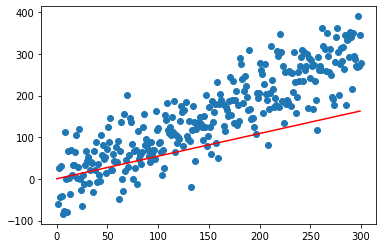

In [3]:
# Calculate initial linear model (should be bad)
res = []
for i in range(300):
    y_pred = (m * i) + b
    res.append(y_pred.value)

# Plot initial state
plt.scatter(x.value, y_true.value)
plt.plot(res, color='r')
plt.show()

## Function to evaluate error of linear regression model

In [4]:
def calc_error(x, y_true, slope, y_intercept):
    y_pred = (slope * x) + y_intercept
    neg_y_pred = -1 * y_pred
    return np.square(neg_y_pred + y_true)

d_error = grad(calc_error)

print(x[100], y_true[100], m, b)
calc_error(x[100], y_true[100], m, b)

101.0 85.19889926322325 <backpass.core.Tensor.Tensor [0.54414078] -leaf ref: 300> <backpass.core.Tensor.Tensor [0.11617081] -leaf ref: 300>


<backpass.core.Tensor.Tensor [907.48606478] ref: 0>

## Run gradient descent to obtain best parameters

In [5]:
for i in range(300):
    d_error(x[i], y_true[i], m, b)
    lr = 0.001
    m.value -= lr * m.grad
    b.value -= lr * b.grad
    
    y = m.value*x[i] + b.value
    print(m.grad, 2*(y_true[i] - y)*x[i])
    m.grad, b.grad = 0, 0

[124.08073996] [-123.584417]
[-103.97280865] [102.93308057]
[264.66750403] [-259.37415395]
[-230.50159056] [222.66453648]
[435.56827839] [-412.91872791]
[1012.83316664] [-937.8835123]
[998.82200382] [-898.93980343]
[-2043.86987974] [1778.16679537]
[17.63482474] [-14.74271349]
[1596.12625569] [-1273.70875204]
[-1834.94240174] [1387.21645572]
[62.44165114] [-44.33357231]
[1042.9351928] [-688.33722725]
[-2244.07579908] [1359.90993424]
[399.98818026] [-219.19352278]
[-529.10780835] [257.14639486]
[-188.77613675] [79.28597744]
[-1213.46776393] [424.71371738]
[-1881.24458464] [519.22350536]
[3810.42043253] [-754.46324564]
[-269.41217037] [31.25181176]
[-4021.92813019] [120.65784391]
[5618.66249551] [337.11974973]
[925.71359426] [142.55989352]
[1725.47984306] [434.82092045]
[-4437.63541474] [-1570.92293682]
[2835.937993] [1304.53147678]
[-3907.58105041] [-2227.32119873]
[437.47347684] [299.23185816]
[1300.50421308] [1043.00437889]
[-1674.68442622] [-1547.40840983]
[5723.94158969] [6010.138669

../../backpass/numpy/core/primitives.py:10: RuntimeWarning: overflow encountered in square
  return np.square(a)
../../backpass/numpy/core/diff_funcs.py:26: RuntimeWarning: overflow encountered in multiply
  return np.array([b * grad, a * grad])
/Users/jahdiel/Documents/backpass/autograd_env/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in multiply
  
/Users/jahdiel/Documents/backpass/autograd_env/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in subtract
  after removing the cwd from sys.path.


## Plot the final linear regression model

<backpass.core.Tensor.Tensor [nan] -leaf ref: 301> <backpass.core.Tensor.Tensor [nan] -leaf ref: 301>


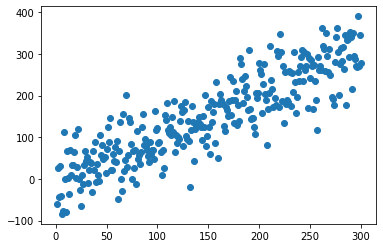

In [6]:
# Calculate final linear model
res = []
for i in range(300):
    y_pred = np.add(np.multiply(m, i), b)
    res.append(y_pred.value)

print(m, b)
# Plot initial state
plt.scatter(x.value, y_true.value)
plt.plot(res, color='r')
plt.show()